In [1]:


from google.colab import files
uploaded = files.upload()



Saving customer_booking.csv to customer_booking.csv


Find the file directory

In [ ]:
## All the import libraries

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# EDA tools
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Single model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Ensemble classifications models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix, classification_report, roc_auc_score,
f1_score, recall_score, precision_score, SCORERS)
import time

# Imbalance, Hyperparameter tunning and pipelines
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [5]:
# custom colors

my_colors = ["#c6b34e","#95354a", "#57b9a8","#b0ddff", "#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffffcd', '#ffeaa4', '#ffca2a','#c6b34e']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

## Data analysis

In [6]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
#Reference: https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/'''

import pandas as pd
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()








,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
#!pip install skimpy
#from skimpy import skim
#skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 50000  │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ num_passengers             │   0 │      0 │    1.6 │      1 │     1 │    1 │    1 │    2 │     9 │   ▇▁    │  │
│ │ purchase_lead              │   0 │      0 │     85 │     90 │     0 │   21 │   51 │  120 │   870 │   ▇▁    │  │
│ │ length_of_stay             │   0 │      0 │     23 │     34 │     0 │    5 │   17 │   28 │   780 │    ▇    │  │
│ │ flight_hour                │   0 │      0 │    9.1 │    5.4 │     0 │    5 │    9 │   13 │    23 │ ▆▇▇▇▂▁  │  │
│ │ wants_extra_baggage        │   0 │      0 │   0.67 │   0.47 │     0 │    0 │    1 │    1 │     1 │ ▃    ▇  │  │
│ │ wants_preferred_seat       │   0 │      0 │    0.3 │   0.46 │     0 │    0 │    0 │    1 │     1 │ ▇    ▃  │  │
│ │ wants_in_flight_meals      │   0 │      0 │   0.43 │   0.49 │     0 │    0 │    0 │    1 │     1 │ ▇    ▆  │  │
│ │ flight_duration            │   0 │      0 │    7.3 │    1.5 │   4.7 │  5.6 │  7.6 │  8.8 │   9.5 │ ▃▃▆▂▅▇  │  │
│ │ booking_complete           │   0 │      0 │   0.15 │   0.36 │     0 │    0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ └────────────────────────────┴─────┴────────┴────────┴────────┴───────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sales_channel                 │      0 │          0 │                           1 │                  50000 │  │
│ │ trip_type                     │      0 │          0 │                           1 │                  50000 │  │
│ │ flight_day                    │      0 │          0 │                           1 │                  50000 │  │
│ │ route                         │      0 │          0 │                           1 │                  50000 │  │
│ │ booking_origin                │      0 │          0 │                         1.1 │                  56910 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
# count booking complete field to check how many '0's and '1's
value_counts = df['booking_complete'].value_counts()
print(f'count of 0s in booking_complete:{value_counts[0]}')
print(f'count of 1s in booking_complete:{value_counts[1]}')

#Get number of unique values for each discrete variable in the dataset.
for col in df.describe().columns:
    if df[col].dtype == int:
       print(f'{col}:', df[col].nunique())

cat_columns =  df.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(f'{col}:', df[col].nunique())

##Get non-numerical features
non_num_cols = list(set(df.columns) - set(df.describe().columns))
print('Non-numerical features: ',non_num_cols)
non_num_cols1 = ['sales_channel', 'trip_type', 'flight_day']
non_num_cols_cnt = len(non_num_cols1)



for i, col in enumerate(non_num_cols):
    print('Value counts for {}:'.format(col))
    print(df[col].value_counts());print()


count of 0s in booking_complete:42522
count of 1s in booking_complete:7478
num_passengers: 9
purchase_lead: 470
length_of_stay: 335
flight_hour: 24
wants_extra_baggage: 2
wants_preferred_seat: 2
wants_in_flight_meals: 2
booking_complete: 2
sales_channel: 2
trip_type: 3
flight_day: 7
route: 799
booking_origin: 104
Non-numerical features:  ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'route']
Value counts for sales_channel:
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Value counts for trip_type:
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Value counts for flight_day:
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

Value counts for booking_origin:
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama  

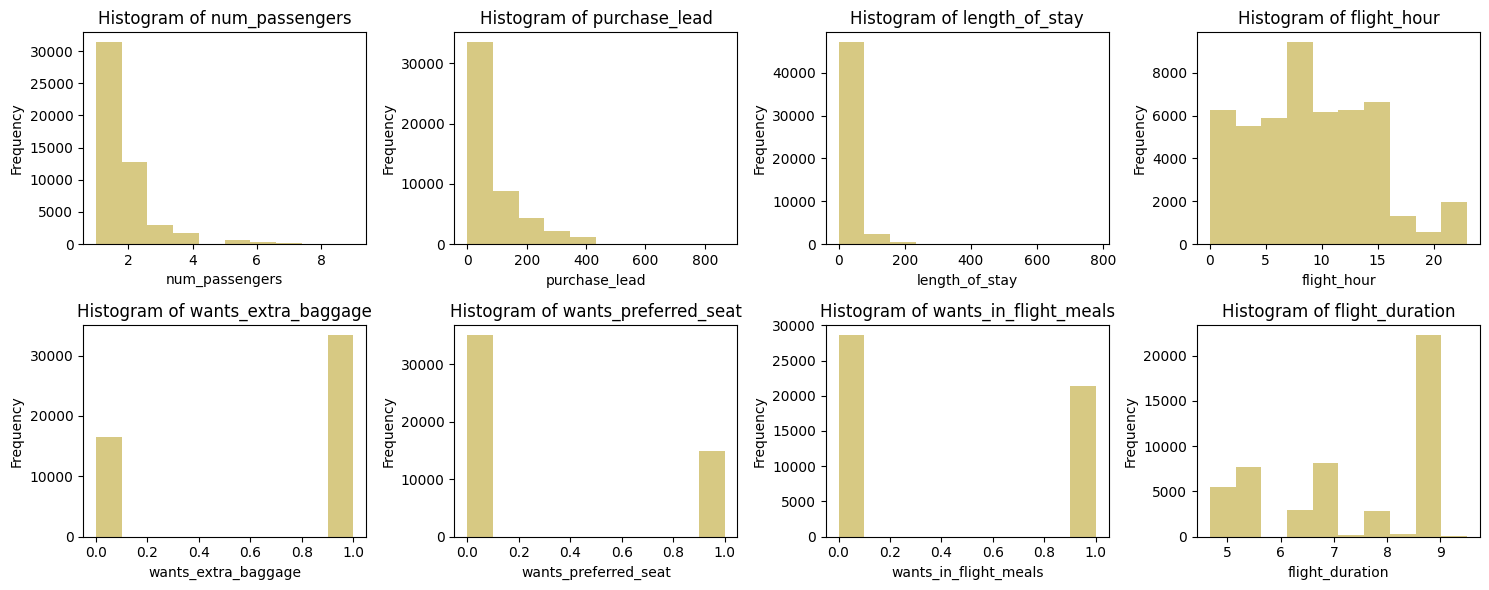

In [9]:
# Set the number of rows and columns for subplots
num_rows = 2
num_cols = 4

df_numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage','wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

# dataset having numerical features
numeric_features = df[df_numeric_cols]



## Draw histogram for all the numeric values

# Flatten the axes for easier iteration
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axes = axes.ravel()

for i, column in enumerate(df_numeric_cols):
    axes[i].hist(df[column], bins=10, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




## Creating bar plot

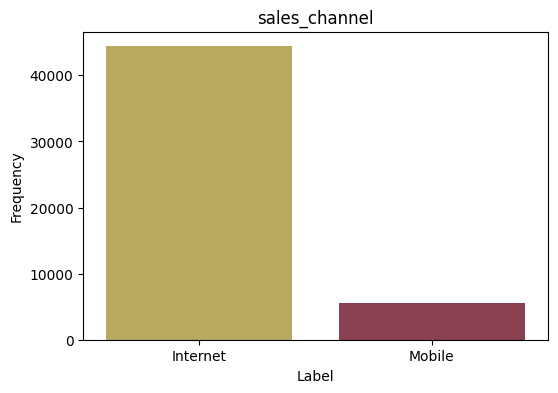

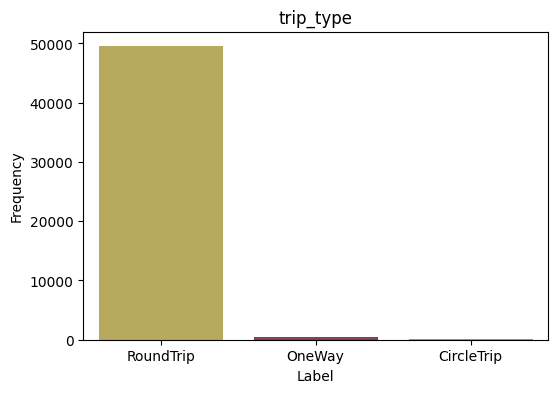

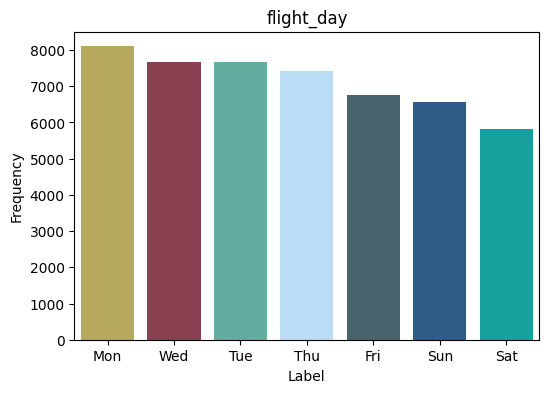

In [10]:
review = df[['sales_channel', 'trip_type', 'flight_day']]
for i in review.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set(title=i, xlabel='Label', ylabel='Frequency')
    plt.show()




In [11]:

##Base model function

## If the value verbose = TRUE is not provided in the calling function, then default value false will be taken.
def basic_models(data=[], verbose=False):
    models=[DecisionTreeClassifier( ),LogisticRegression(),
            RandomForestClassifier(),GradientBoostingClassifier( )]

    if len(data)== 2:
       X_train, X_test, y_train, y_test = train_test_split(data[0],data[1],test_size = 0.25,random_state=123)

    else:
       X_train, X_test, y_train, y_test = data[0],data[1],data[2],data[3]


    #Instantiate lists to store each of the models results
    accuracy = []
    f1 = []
    roc_auc = []
    recall = []
    precision = []
    #Run thorugh each of the models to get their performance metrics
    for model in models:
       clf = model
       k = 5
       f1_mean = np.mean(cross_val_score(model, X_train, y_train, cv=k, scoring='f1'))
       accuracy_mean = np.mean(cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy'))
       roc_auc_mean = np.mean(cross_val_score(model, X_train, y_train, cv=k, scoring='roc_auc'))
       recall_mean = np.mean(cross_val_score(model, X_train, y_train, cv=k, scoring='recall'))
       precision_mean = np.mean(cross_val_score(model, X_train, y_train, cv=k, scoring='precision'))
       f1.append(f1_mean)
       accuracy.append(accuracy_mean)
       roc_auc.append(roc_auc_mean)
       recall.append(recall_mean)
       precision.append(precision_mean)

       if verbose:
            print('Classification Model: ',model,'\n')
            print(classification_report(y_test, test_preds),'\n')
    #store results in dataframe
    results = pd.DataFrame([f1,roc_auc, accuracy, precision,recall],
                          index= ['f1','roc_auc','accuracy','precision','recall',],
                          columns=['DecisionTree','LogisticRegression','RandomForest','Gradient Boosting'])

    #Change orientation of the dataframe
    return results.transpose()


def plot_feature_importance(clf,index):
    '''Plot the 0 most important features for a classifier model in a bar chart
    according to importance'''
    feature_importances = pd.DataFrame(clf.feature_importances_, index=index, columns=['Score'])
    feature_importances = feature_importances.sort_values(by='Score',ascending=True).tail(10)
    feature_importances.plot(kind='barh', title='Top 10 Important Features',legend=False)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show();

def heatmap(data,figsize=(8,8), annot=False):
    #plot heatmap to find multicollinearity
    plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(data.corr(),vmin=-0.75,vmax=0.75,center=0, cmap=cmap,annot=annot);

In [12]:
## Missing value imputation

missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing values found in the dataset.")


No missing values in the dataset.


In [13]:
#load the X & y
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

In [14]:
# Numerical and categorical feature names
obj_cols = df.select_dtypes(exclude='number').columns
num_cols = X.select_dtypes(include='number').columns
print('Categorical columns:\n', obj_cols);print()
print('Numeric columns:\n',num_cols)

Categorical columns:
 Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

Numeric columns:
 Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')


In [15]:
## encoding technique for categorical variables
# Converting categorical variables to numeric data
cat_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
        ('target encoding', ce.TargetEncoder())
    ]
)

# Scaling numerical features and filling missing values
num_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='mean')),
          ('scale', StandardScaler())]
)

# Numerical and categorical feature names
obj_cols = df.select_dtypes(exclude='number').columns
num_cols = X.select_dtypes(include='number').columns
print('Categorical columns:\n', obj_cols);print()
print('Numeric columns:\n',num_cols)

# Combining the two pipelines with a column transformer

full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols),
        ('categorical', cat_pipeline, obj_cols)
    ]
)

# Fitting the pipeline
X_ = full_pipeline.fit_transform(X, y)

# Create DataFrames with correct column names
X = pd.DataFrame(X_, columns=X.columns)



Categorical columns:
 Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

Numeric columns:
 Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')


Build the basic models

In [16]:
## The given data set is taken as it is and only transformation done is to convert the categorical to numerical values. The data set is fully numeric now
## Basic model is called to run and draw the metrics.


results1 = basic_models(data=[X, y])

#Display the results of the models as a dataframe
#Sort models according to roc_auc score.
print(results1)
results1.sort_values('roc_auc',ascending=False)

print('Best Model per Metric')
for metric in results1.columns:
    print(f'{metric.capitalize()}:',results1.sort_values(metric,ascending=False).index[0])

##The results of this model produced roc_auc of 80% and demonstrating Gradient boosting as the best model


                          f1   roc_auc  accuracy  precision    recall
DecisionTree        0.320274  0.598484  0.785440   0.304515  0.331966
LogisticRegression  0.181977  0.789338  0.847840   0.466286  0.113153
RandomForest        0.231903  0.793556  0.853600   0.530290  0.152355
Gradient Boosting   0.162341  0.803854  0.853467   0.561761  0.094977
Best Model per Metric
F1: DecisionTree
Roc_auc: Gradient Boosting
Accuracy: RandomForest
Precision: Gradient Boosting
Recall: DecisionTree


The DecisionTree is the best performing so far. Being this a binary classification problem with an imbalanced dataset, f1 and roc_auc scores are quiet important. The f1 score is the harmonic mean between precision and recall, while the roc_auc score is the area under the roc curve from the predicted values. It is important to distiguish between both categories since marketing strategies could be costly if not applied correctly to the users.

       num_passengers  sales_channel  trip_type  purchase_lead  \
17325       -0.579559       0.111216   0.677405       0.357251   
13544       -0.579559       0.299164  -0.148863       0.726759   
49844       -0.579559       2.200757  -0.502977      -0.012257   
16371       -0.579559      -0.905915   1.857787       0.172497   
13084       -0.579559       0.321275   0.382309       2.574298   
...               ...            ...        ...            ...   
7763         2.361172       0.066993   0.441328       1.096267   
15377       -0.579559      -0.717967   1.149558      -1.305534   
17730       -0.579559      -0.928027   0.205252      -1.490288   
28030        0.400684      -0.706912  -0.591506       0.542005   
15725       -0.579559       1.172570  -0.148863       0.357251   

       length_of_stay  flight_hour  flight_day     route  booking_origin  \
17325        0.703747    -0.649919   -0.863497 -1.688589        0.154770   
13544        0.703747    -0.649919   -0.863497 -0.43929

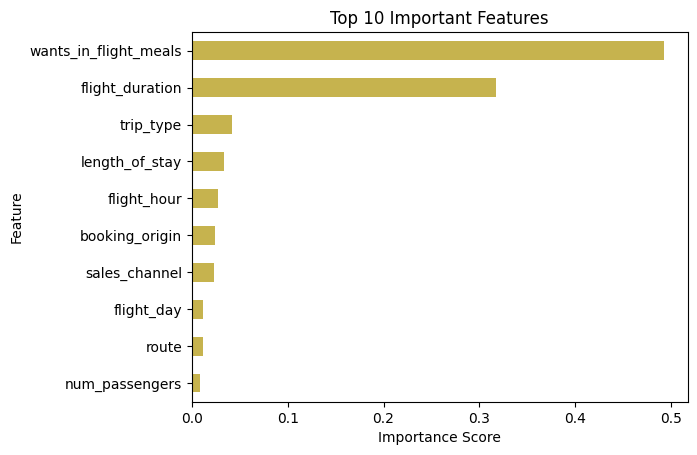

Number of data rows in the training set: 35000
Number of data rows in the test set: 15000


In [17]:
#!pip uninstall matplotlib

#!pip install matplotlib
#!pip install --upgrade pip
import matplotlib.pyplot as plt
df1 = df.drop(['booking_complete'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=123)
print(X_train)
X_train.columns.tolist()
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
plot_feature_importance(clf,df1.columns)

 # For the training set
num_train_samples = X_train.shape[0]
print("Number of data rows in the training set:", num_train_samples)

    # For the test set
num_test_samples = X_test.shape[0]
print("Number of data rows in the test set:", num_test_samples)

Multicollinearity

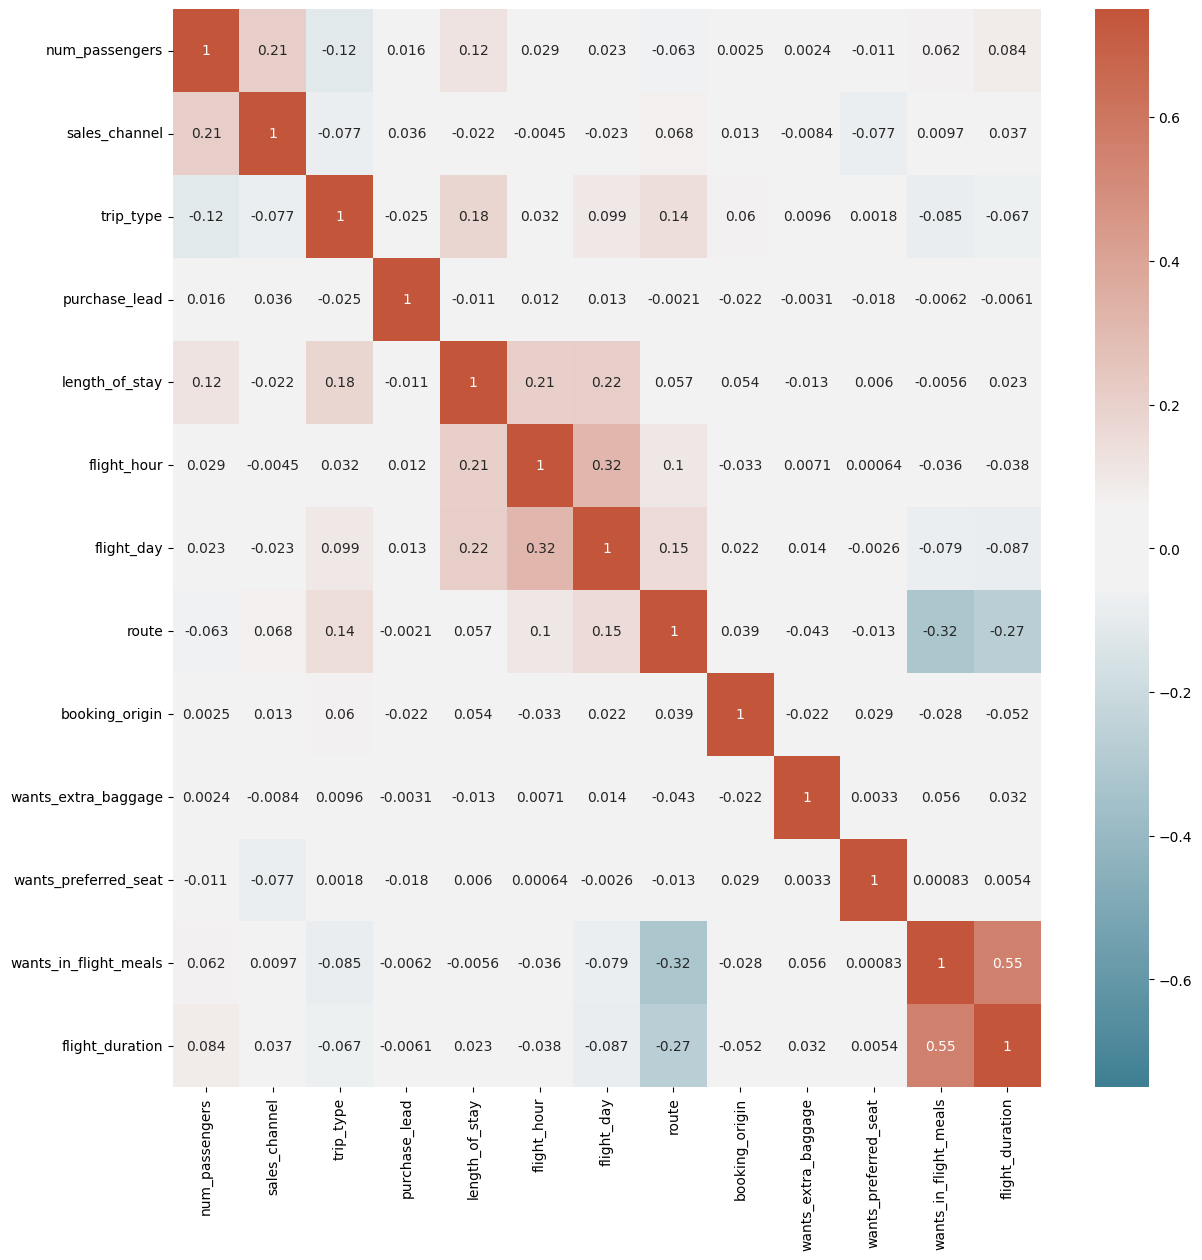

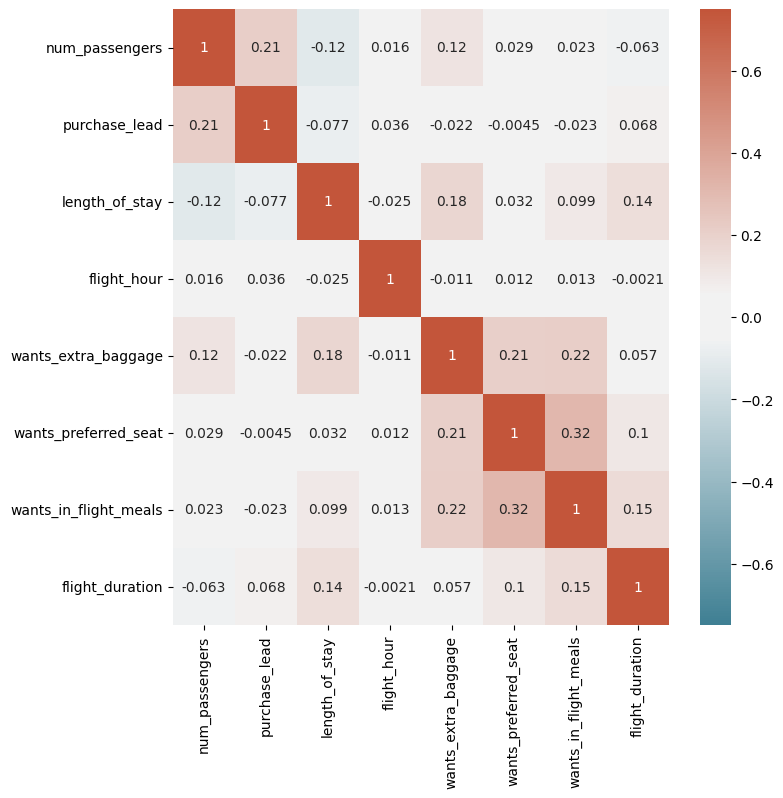

In [18]:
# Identify and drop columns starting with 'booking_origin'
ohc_df1 = X

columns_to_drop = [col for col in ohc_df1 if col.startswith('booking_origin_') or col.startswith('route_')]
ohc_df1.drop(columns=columns_to_drop, inplace=True)

#Heat map with only input variables
heatmap(ohc_df1,figsize=(14,14), annot=True)

#Heat map with only numerical features
heatmap(numeric_features,figsize=(8,8), annot=True);



Draw the scatter plot to check correlation between the input variable and output variable

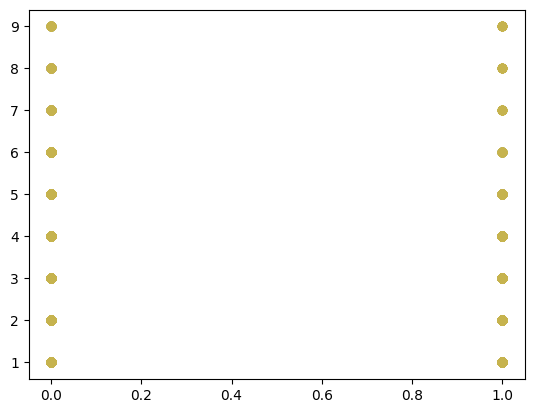

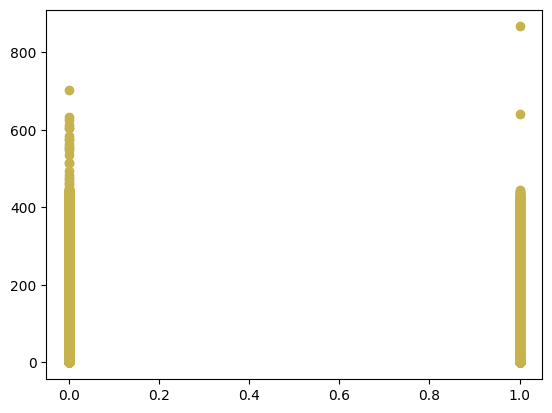

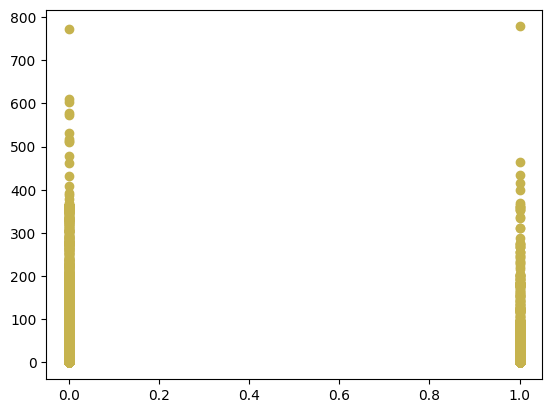

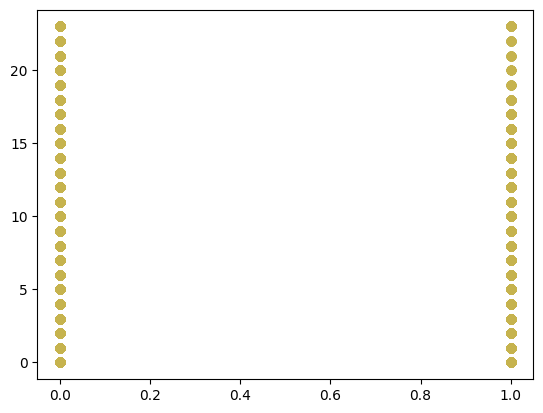

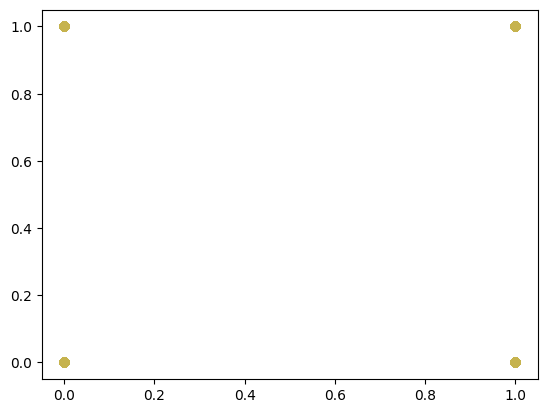

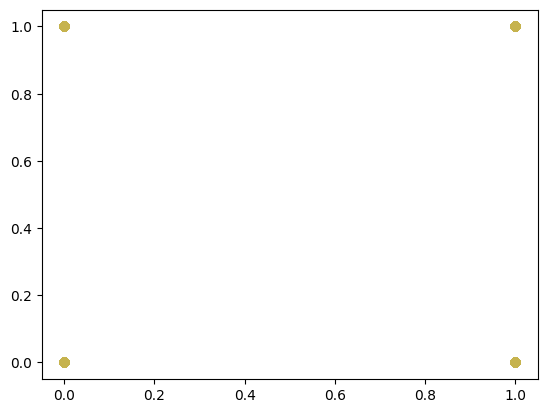

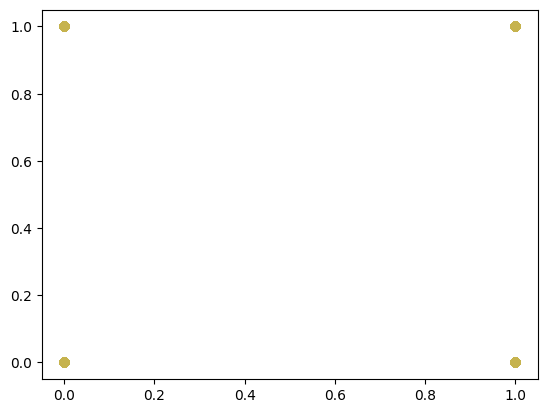

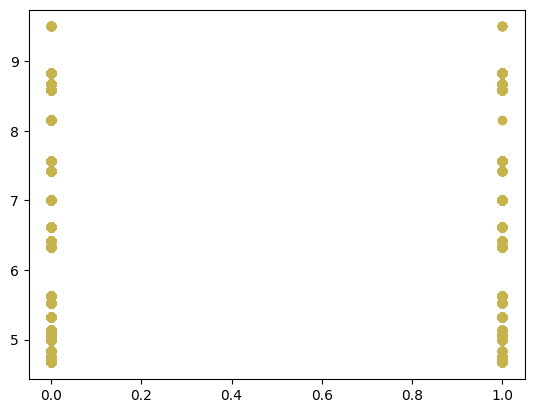

KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [19]:
## scatter plot
for col in df_numeric_cols:
    plt.scatter(df['booking_complete'], df[col])
    plt.show()

for col in non_num_cols1:
    plt.scatter(df['booking_complete'], df[col])
    plt.show()




It seems that multicolinearity is no longer an issue in the data set. The scatter plot also shows that there is no strong relationship between the data.

And now, all is left regarding data transformation is scaling the data.





Scaling the data first fitting it and transforming the training set
to later aply the fit to transform the test set.'''


##DATA SET prep for SMOTE execution



convert the data in the dataframe using smote so that the dataset is balanced values for 'booking_complete'. Currently, we see a very imbalanced dataset.

In [20]:
# import library
from imblearn.over_sampling import SMOTE, SMOTENC

In [21]:
categorical_column = df.select_dtypes(exclude='number').columns
continuous_column = X.select_dtypes(include='number').columns

# Separate features into categorical and continuous
categorical_features = [X.columns.get_loc(col) for col in categorical_column]
continuous_features = [X.columns.get_loc(col) for col in continuous_column]

# Apply SMOTE to categorical features using SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled_cat, y_resampled_cat = smote_nc.fit_resample(X, y)

# Apply SMOTE to continuous features
smote = SMOTE(random_state=42)
X_resampled_cont, y_resampled_cont = smote.fit_resample(X.iloc[:, continuous_features], y)

# Merge the resampled data
X_resampled = pd.concat([pd.DataFrame(X_resampled_cat, columns=X.columns),
                               pd.DataFrame(X_resampled_cont, columns=X.columns[continuous_features])], axis=1)
y_resampled = y_resampled_cat

In [22]:
# view resampled features
X_resampled.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.15477,0.150575,...,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.15477,0.150575,0.148142,0.07478,0.050279
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.15477,0.150575,...,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.15477,0.150575,0.148142,0.07478,0.050279
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.15477,0.150575,...,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.15477,0.150575,0.163148,0.07478,0.103150
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.15477,0.150575,...,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.15477,0.150575,0.148142,0.07478,0.050279
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.15477,0.150575,...,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.15477,0.150575,0.163148,0.07478,0.103150


In [23]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
85039    1
85040    1
85041    1
85042    1
85043    1
Name: booking_complete, Length: 85044, dtype: int64

In [24]:
# Count occurrences of each target class
counts = Counter(y_resampled)
for value, count in counts.items():
    print(f'{value}: {count}')

# dimension of resmaples
print(X_resampled.shape, y_resampled.shape)

0: 42522
1: 42522
(85044, 26) (85044,)


In [25]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,
                                                                                            y_resampled, random_state=101, test_size=0.25)

results2 = basic_models(data=[X_train_resampled, X_test_resampled,y_train_resampled,y_test_resampled])

#Display the results of the models as a dataframe
#Sort models according to roc_auc score.
print(results2)
results2.sort_values('accuracy',ascending=False)

print('Best Model per Metric')
for metric in results2.columns:
    print(f'{metric.capitalize()}:',results2.sort_values(metric,ascending=False).index[0])

##The results of this model produced roc_auc of 80% and demonstrating Gradient boosting as the best model


                          f1   roc_auc  accuracy  precision    recall
DecisionTree        0.861474  0.860344  0.860621   0.857782  0.864821
LogisticRegression  0.758968  0.823225  0.757929   0.755696  0.762284
RandomForest        0.906062  0.965650  0.909224   0.942796  0.872033
Gradient Boosting   0.893798  0.960207  0.898421   0.936409  0.854912
Best Model per Metric
F1: RandomForest
Roc_auc: RandomForest
Accuracy: RandomForest
Precision: RandomForest
Recall: RandomForest


Using smote, I can see that the Random forest model had greater accuracy of 90% and roc_auc is around 96% and all other scores also seemed to have improved a lot.


In [ ]:
!git clone https://github.com/deepakarthick82/BritishAirways_InternshipTask2